In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [3]:
hists={}
for filename in os.listdir('../pods/2016'):
    print(filename)
    with gzip.open('../pods/2016/'+filename) as fin:
        hin = pickle.load(fin)
        for k in hin.keys():
            if k in hists: hists[k]+=hin[k]
            else: hists[k]=hin[k]
        
print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("dataset"))

ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-400To600_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-800To1200_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-200To400_13TeV-madgraph.pkl.gz
{('ZJetsToNuNu_HT-100To200_13TeV-madgraph',): (array([3.14678977e+01, 2.74531143e+00, 4.06481191e-01, 7.50426814e-02,
       1.87606703e-02, 2.50142271e-02, 0.00000000e+00, 1.25071136e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([1.96786285e-01, 1.71679609e-02, 2.54195321e-03, 4.69283669e-04,
       1.17320917e-04, 1.56427890e-04, 0.00000000e+00, 7.82139448e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset",)
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zjets"] = ("ZJets*",)
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("process"))
print(hists['recoil'])

{('Zjets',): (array([4.90089223e+02, 2.64837006e+02, 1.50018925e+02, 8.35391658e+01,
       4.55590121e+01, 2.37842580e+01, 1.59276308e+01, 8.62861480e+00,
       5.02662876e+00, 2.94835207e+00, 2.01428772e+00, 1.03689583e+00,
       5.92028591e-01, 3.25375989e-01, 1.63638288e-01, 1.02168669e-01,
       6.05074637e-02, 3.81047946e-02, 2.71274382e-02, 1.32836743e-02,
       7.40042210e-03]), array([5.99895215e-01, 2.42953075e-01, 1.26858403e-01, 6.49172619e-02,
       3.02324353e-02, 1.13645046e-02, 3.76760230e-03, 1.05455672e-03,
       4.53604715e-04, 2.19815509e-04, 1.08984083e-04, 2.91733152e-05,
       1.44255924e-05, 6.10346015e-06, 2.49415422e-06, 1.14641239e-06,
       5.96285547e-07, 3.66770374e-07, 2.53844653e-07, 1.15983028e-07,
       5.13362989e-08]))}
['Zjets']
<Hist (process,recoil) instance at 0x120f9d5f8>


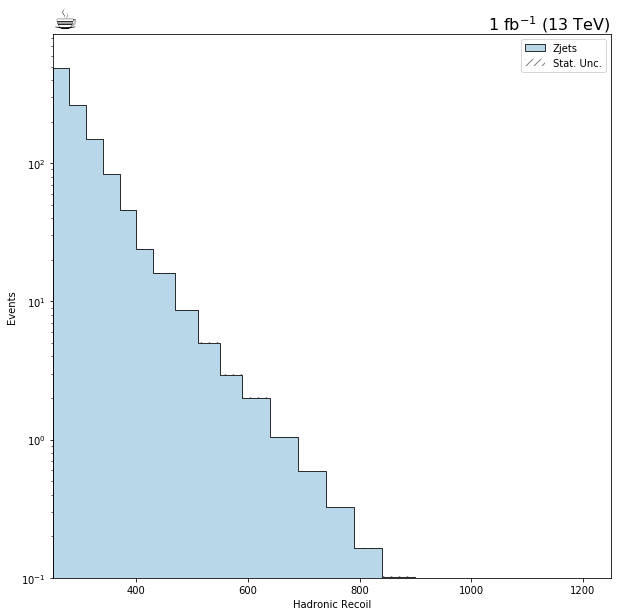

In [6]:
from cycler import cycler

fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_prop_cycle(cycler(color=colors))

#print(hists['recoil'],hists['recoil'].values(sumw2=True))
#print(hists['recoil'].identifiers("process")[0] == "Zjets")
#to_plot = hists['recoil'].project("process","Zjets")
#print(to_plot.values(sumw2=True))

plot.plot1d(hists['recoil'], ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)

ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
ax.set_ylim(.1, None)
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)